In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

#  DATA  CLEANING, EXPLORATION, ANALYSIS AND MODEL BUILDING

## DATA WRANGLING
* This function *Wrangle_Data* reads the data using .read_csv method from pandas library.
* The function is enhanced to clean the data and finally select the required data (Inforce and surrednder)
  needed for analysis

In [2]:
def Wrangle_Data(file_path):
    df = pd.read_csv(file_path, delimiter = ";")
    df.drop(columns = ['Unnamed: 20','Unnamed: 21'], axis = 1, inplace = True)
    df["BENEFIT"] = df["BENEFIT"].str.strip().str.replace(",", "")
    df["Premium"] = df["Premium"].str.strip().str.replace(",", "")
    df.replace("-", np.nan, inplace = True)
    df[["BENEFIT","Premium"]] = df[["BENEFIT","Premium"]].astype('float')
    #condition = (df["POLICY STATUS"] == "Inforce")|(df["POLICY STATUS"]=="Surrender")
    #surr_df = df[condition]
    df.dropna(subset=["Premium","BENEFIT"], axis = 0, inplace = True)
    df = df[df["ENTRY AGE"]>= 16]
    #average_benefit = surr_df["BENEFIT"].mean(axis = 0)
    #surr_df["BENEFIT"].replace(np.nan, average_benefit, inplace = True)
    #surr_df =  surr_df[surr_df["Premium"]>=0]
    return df

**READ DATA** <br>
Read data using using the function above and display the first five datapoints .head() method of the pandas library

In [3]:
path = r"C:\Users\IBRAHIM HAKEEM\Desktop\Final yr Project\Kaggle.csv"
life_df = Wrangle_Data(path)
life_df.head()                                                                                                                                                                  

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,BENEFIT,NON LAPSE GUARANTEED,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date
0,1,1,1,36,F,1,1,A,Annually,Inforce,200000.0,NO NLG,0.0,0,0.0,N,8.000000,9,280.0,Aug-11
1,1,1,1,42,M,1,2,A,Annually,Inforce,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,200.0,Aug-11
2,1,1,2,40,M,2,3,A,Annually,Lapse,80000.0,NO NLG,0.0,0,0.0,N,8.000000,9,1289.0,Aug-11
3,1,1,3,39,M,1,2,A,Monthly,Lapse,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,216.0,Aug-11
4,1,1,4,44,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,140.0,Sep-11


In [4]:
life_df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

In [5]:
import seaborn as sns

In [6]:
life_df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,BENEFIT,NON LAPSE GUARANTEED,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date
0,1,1,1,36,F,1,1,A,Annually,Inforce,200000.0,NO NLG,0.0,0,0.0,N,8.000000,9,280.0,Aug-11
1,1,1,1,42,M,1,2,A,Annually,Inforce,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,200.0,Aug-11
2,1,1,2,40,M,2,3,A,Annually,Lapse,80000.0,NO NLG,0.0,0,0.0,N,8.000000,9,1289.0,Aug-11
3,1,1,3,39,M,1,2,A,Monthly,Lapse,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,216.0,Aug-11
4,1,1,4,44,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,140.0,Sep-11


In [7]:
life_df.shape

(82250, 20)

In [8]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82250 entries, 0 to 185559
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CHANNEL1                   82250 non-null  int64  
 1   CHANNEL2                   82250 non-null  int64  
 2   CHANNEL3                   82250 non-null  int64  
 3   ENTRY AGE                  82250 non-null  int64  
 4   SEX                        82250 non-null  object 
 5   POLICY TYPE 1              82250 non-null  int64  
 6   POLICY TYPE 2              82250 non-null  int64  
 7   POLICY TYPE 3              82250 non-null  object 
 8   PAYMENT MODE               82250 non-null  object 
 9   POLICY STATUS              82250 non-null  object 
 10  BENEFIT                    82250 non-null  float64
 11  NON LAPSE GUARANTEED       82250 non-null  object 
 12  SUBSTANDARD RISK           82250 non-null  float64
 13  NUMBER OF ADVANCE PREMIUM  82250 non-null  in

In [9]:
life_df.describe().round(3)

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,POLICY TYPE 1,POLICY TYPE 2,BENEFIT,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Policy Year (Decimal),Policy Year,Premium
count,82250.000,82250.000,82250.000,82250.000,82250.000,82250.000,82250.000,82250.000,82250.000,82250.000,82250.000,82250.000,82250.000
mean,4.164,2.462,10.096,34.877,6.702,29.449,34723.722,0.568,0.000,384.274,2.914,3.455,1289.669
std,2.083,0.561,14.246,10.240,4.147,22.411,81105.057,7.466,0.029,4373.421,1.768,1.771,5675.215
min,1.000,1.000,0.000,16.000,1.000,1.000,30.000,-50.000,0.000,0.000,0.000,1.000,0.000
25%,2.000,2.000,0.000,27.000,3.000,5.000,10000.000,0.000,0.000,0.000,1.417,2.000,106.000
50%,6.000,2.000,1.000,33.000,6.000,34.000,20000.000,0.000,0.000,0.000,3.000,4.000,432.000
75%,6.000,3.000,17.000,42.000,10.000,54.000,40000.000,0.000,0.000,0.000,4.083,5.000,960.000
max,8.000,3.000,82.000,70.000,20.000,84.000,5000000.000,250.000,5.000,266017.237,8.000,9.000,427053.000


In [10]:
life_df.describe(include=[object])

,SEX,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,NON LAPSE GUARANTEED,Full Benefit?,Issue Date
count,82250,82250,82250,82250,82250,82250,82250
unique,2,4,5,5,4,1,97
top,M,A,Monthly,Lapse,NO NLG,N,Dec-15
freq,49363,67856,63093,43253,81553,82250,2584


In [11]:
corr = life_df.select_dtypes(include = ['number']).corr()
corr

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,POLICY TYPE 1,POLICY TYPE 2,BENEFIT,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Policy Year (Decimal),Policy Year,Premium
CHANNEL1,1.000000,-0.643608,0.591295,-0.140963,0.138191,0.216680,-0.098590,-0.045200,-0.013854,0.119641,-0.177560,-0.178516,-0.140025
CHANNEL2,-0.643608,1.000000,-0.620169,0.223960,0.126627,0.048263,0.052076,0.024318,0.012785,0.084228,-0.129982,-0.122847,0.117414
CHANNEL3,0.591295,-0.620169,1.000000,-0.201655,-0.067192,-0.009998,-0.078430,-0.032555,-0.009452,-0.062272,-0.017647,-0.023073,-0.109307
ENTRY AGE,-0.140963,0.223960,-0.201655,1.000000,0.044952,0.035046,0.055049,0.079782,0.007812,0.076758,-0.056572,-0.054104,0.107971
POLICY TYPE 1,0.138191,0.126627,-0.067192,0.044952,1.000000,0.952581,0.005734,-0.033045,0.003471,0.137035,-0.607837,-0.595786,0.011412
POLICY TYPE 2,0.216680,0.048263,-0.009998,0.035046,0.952581,1.000000,0.000549,-0.030720,0.000198,0.116926,-0.528396,-0.519941,0.008466
BENEFIT,-0.098590,0.052076,-0.078430,0.055049,0.005734,0.000549,1.000000,0.086917,0.014104,0.025109,-0.038230,-0.039684,0.423930
SUBSTANDARD RISK,-0.045200,0.024318,-0.032555,0.079782,-0.033045,-0.030720,0.086917,1.000000,0.001776,-0.006688,0.011436,0.012563,0.095636
NUMBER OF ADVANCE PREMIUM,-0.013854,0.012785,-0.009452,0.007812,0.003471,0.000198,0.014104,0.001776,1.000000,-0.001172,-0.011591,-0.013783,0.007008
INITIAL BENEFIT,0.119641,0.084228,-0.062272,0.076758,0.137035,0.116926,0.025109,-0.006688,-0.001172,1.000000,-0.112055,-0.107444,-0.019114


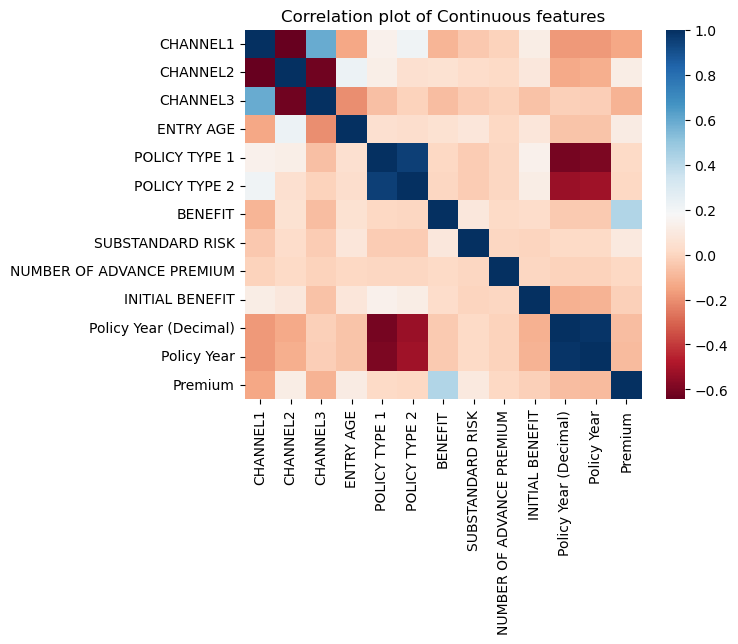

In [12]:
sns.heatmap(corr, cmap="RdBu");
plt.title('Correlation plot of Continuous features');

In [13]:
life_df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date'],
      dtype='object')

In [14]:
policy_state = life_df["POLICY STATUS"].value_counts().to_frame()
policy_state.rename(columns = {"POLICY STATUS":"Frequency of Policy Status"}, inplace = True)
policy_state.index.name = "POLICY STATUS"
policy_state

,Frequency of Policy Status
POLICY STATUS,
Lapse,43253
Inforce,30894
Surrender,7780
Death,230
Expired,93


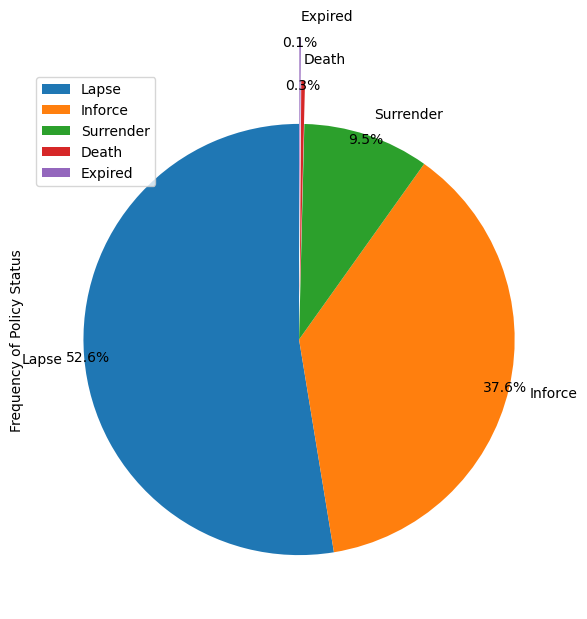

In [15]:
policy_state.plot(kind = 'pie',
                   y = "Frequency of Policy Status",
                   figsize=(7,7), 
                   autopct = '%1.1f%%',
                   startangle = 90,
                   pctdistance = 0.98,
                   explode = [0,0,0,0.2,0.4])
plt.legend( loc = 'upper left')
plt.show()

In [16]:
condition = ((life_df['POLICY STATUS'] == 'Inforce')|(life_df["POLICY STATUS"] == 'Surrender')|(life_df["POLICY STATUS"] == "Lapse"))
life_df = life_df[condition]
print(life_df.shape)
life_df.head()

(81927, 20)


,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,BENEFIT,NON LAPSE GUARANTEED,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date
0,1,1,1,36,F,1,1,A,Annually,Inforce,200000.0,NO NLG,0.0,0,0.0,N,8.000000,9,280.0,Aug-11
1,1,1,1,42,M,1,2,A,Annually,Inforce,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,200.0,Aug-11
2,1,1,2,40,M,2,3,A,Annually,Lapse,80000.0,NO NLG,0.0,0,0.0,N,8.000000,9,1289.0,Aug-11
3,1,1,3,39,M,1,2,A,Monthly,Lapse,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,216.0,Aug-11
4,1,1,4,44,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,140.0,Sep-11


In [17]:
life_df["POLICY STATUS"].value_counts()

Lapse        43253
Inforce      30894
Surrender     7780
Name: POLICY STATUS, dtype: int64

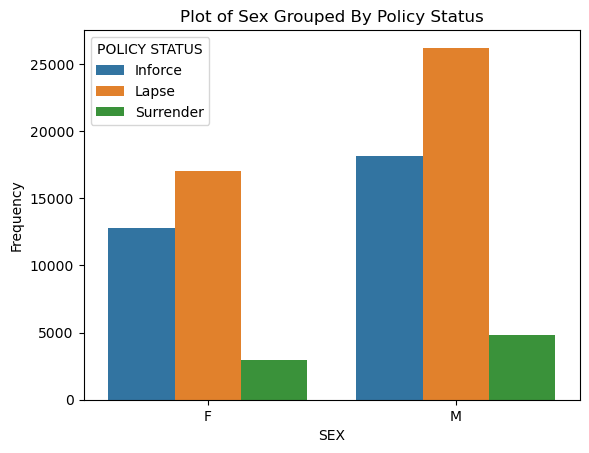

In [18]:
sns.countplot(x = "SEX", data = life_df, hue = 'POLICY STATUS')
plt.title('Plot of Sex Grouped By Policy Status')
plt.ylabel('Frequency')
plt.show()

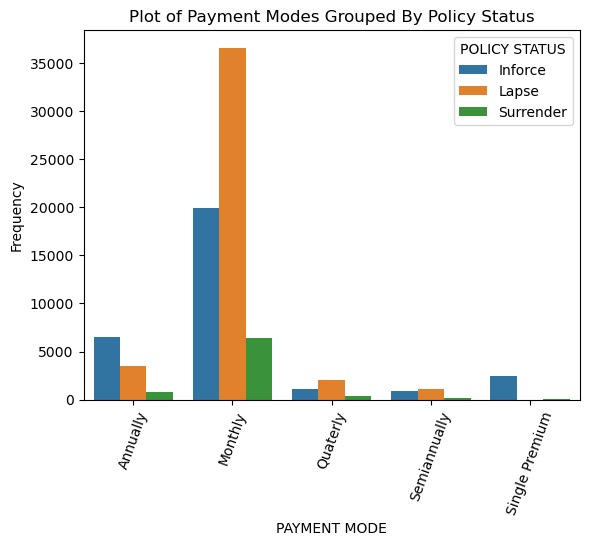

In [19]:
sns.countplot(x = "PAYMENT MODE", data = life_df, hue = 'POLICY STATUS')
plt.xticks(rotation = 70)
plt.title('Plot of Payment Modes Grouped By Policy Status')
plt.ylabel('Frequency')
plt.show()

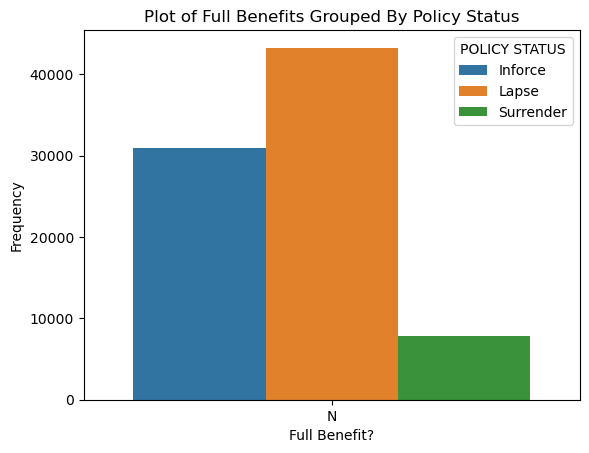

In [20]:
sns.countplot(x = "Full Benefit?", data = life_df, hue = 'POLICY STATUS')
plt.title('Plot of Full Benefits Grouped By Policy Status')
plt.ylabel('Frequency')
plt.show()

In [21]:
A = life_df[['Policy Year (Decimal)', 'POLICY STATUS']].groupby('Policy Year (Decimal)', as_index=False)['POLICY STATUS'].value_counts()
A.rename({'count':'Status_Count'}, axis = 1, inplace = True)
A

,Policy Year (Decimal),POLICY STATUS,Status_Count
0,0.000000,Inforce,1457
1,0.000000,Surrender,1
2,0.083333,Inforce,1024
3,0.083333,Surrender,7
4,0.166667,Inforce,730
...,...,...,...
280,7.916667,Lapse,73
281,7.916667,Inforce,4
282,8.000000,Lapse,67
283,8.000000,Inforce,6


In [22]:
B= life_df[['Policy Year (Decimal)']].groupby('Policy Year (Decimal)')['Policy Year (Decimal)'].count().to_frame()
B.rename(columns = {'Policy Year (Decimal)':'S_count'}, inplace = True)
B.reset_index(inplace = True)
B

,Policy Year (Decimal),S_count
0,0.000000,1458
1,0.083333,1031
2,0.166667,739
3,0.250000,1222
4,0.333333,984
...,...,...
92,7.666667,104
93,7.750000,78
94,7.833333,78
95,7.916667,77


In [23]:
Rates = (A.merge(B,left_on='Policy Year (Decimal)',right_on = 'Policy Year (Decimal)',
                 how = 'left').assign(rates = lambda x:x['Status_Count'].div(x['S_count'])).reindex(columns = [*A.columns]+['rates']))
Rates

,Policy Year (Decimal),POLICY STATUS,Status_Count,rates
0,0.000000,Inforce,1457,0.999314
1,0.000000,Surrender,1,0.000686
2,0.083333,Inforce,1024,0.993210
3,0.083333,Surrender,7,0.006790
4,0.166667,Inforce,730,0.987821
...,...,...,...,...
280,7.916667,Lapse,73,0.948052
281,7.916667,Inforce,4,0.051948
282,8.000000,Lapse,67,0.893333
283,8.000000,Inforce,6,0.080000


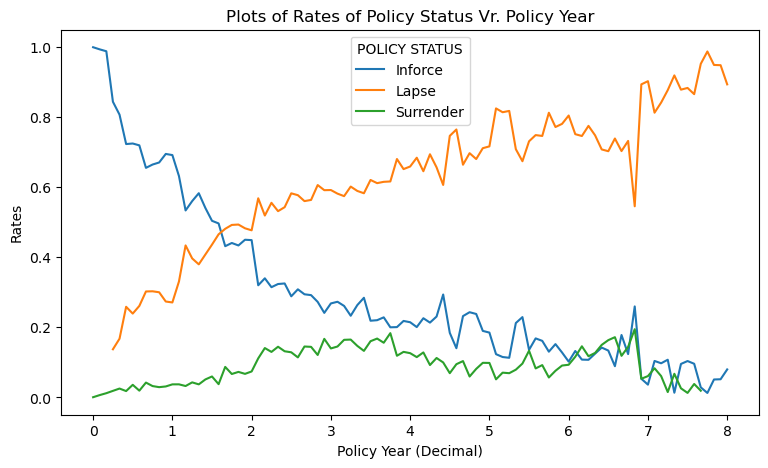

In [24]:
tb = Rates.pivot(index = 'Policy Year (Decimal)',columns='POLICY STATUS',values= 'rates')
tb.plot(figsize = (9,5),ylabel = 'Rates', title = 'Plots of Rates of Policy Status Vr. Policy Year')
plt.show()

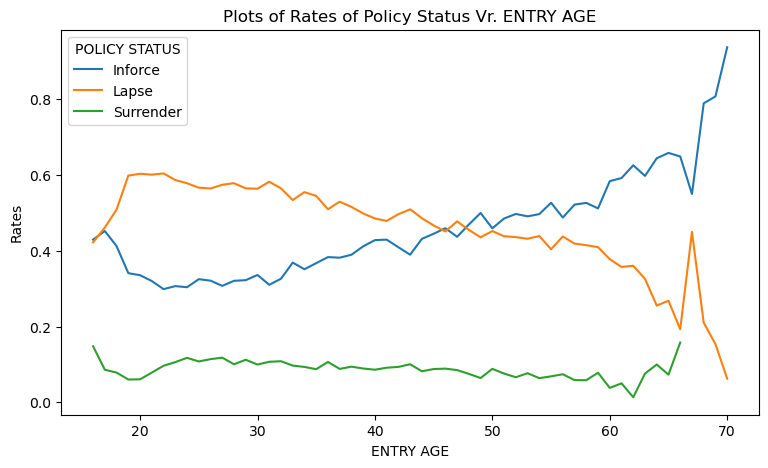

In [25]:
entry_df = life_df[['ENTRY AGE', 'POLICY STATUS']].groupby('ENTRY AGE', as_index=False)['POLICY STATUS'].value_counts()
entry_df.rename({'count':'Status_Count'}, axis = 1, inplace = True)
enter_df= life_df[['ENTRY AGE']].groupby('ENTRY AGE')['ENTRY AGE'].count().to_frame()
enter_df.rename(columns = {'ENTRY AGE':'S_count'}, inplace = True)
enter_df.reset_index(inplace = True)
enter_Rates = (entry_df.merge(enter_df,left_on='ENTRY AGE',right_on = 'ENTRY AGE',
                 how = 'left').assign(rates = lambda x:x['Status_Count'].div(x['S_count'])).reindex(columns = [*entry_df.columns]+['rates']))
#Prem_Rates
enter_tb = enter_Rates.pivot(index = 'ENTRY AGE',columns='POLICY STATUS',values= 'rates')
enter_tb.plot(figsize = (9,5),ylabel = 'Rates', title = 'Plots of Rates of Policy Status Vr. ENTRY AGE')
#plt.ylim((0,100000))
plt.show()

[  108.  5072. 10036. 15000.]
POLICY STATUS      Inforce     Lapse  Surrender
Premium_category                               
Low               0.679645  0.646263   0.247409
Medium            0.903213  0.649695   0.498302
High              0.931056  0.654588   0.631635


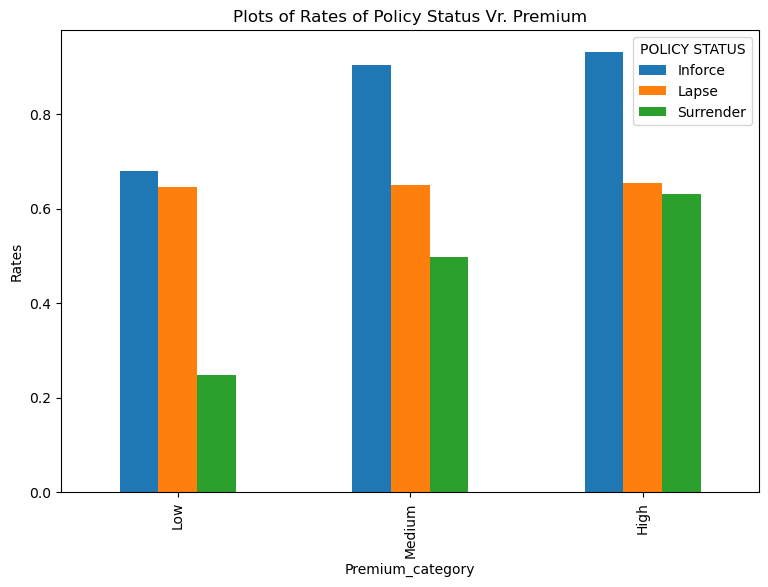

In [26]:
low, high = life_df['Premium'].quantile([.25, .99])
premium_df = life_df[life_df['Premium'].between(low, high)]
prem_df = premium_df[['Premium', 'POLICY STATUS']].groupby('Premium', as_index=False)['POLICY STATUS'].value_counts()
prem_df.rename({'count':'Status_Count'}, axis = 1, inplace = True)
pre_df= premium_df[['Premium']].groupby('Premium')['Premium'].count().to_frame()
pre_df.rename(columns = {'Premium':'S_count'}, inplace = True)
pre_df.reset_index(inplace = True)
pre_Rates = (prem_df.merge(pre_df,left_on='Premium',right_on = 'Premium',
                 how = 'left').assign(rates = lambda x:x['Status_Count'].div(x['S_count'])).reindex(columns = [*prem_df.columns]+['rates']))
labels = ['Low','Medium','High']
intervals = np.linspace(min(pre_Rates['Premium']),max(pre_Rates['Premium']),4)
print(intervals)
pre_Rates["Premium_category"] = pd.cut(pre_Rates['Premium'], intervals, labels= labels, include_lowest=True)
pre_Rates
pre_group = pre_Rates[['POLICY STATUS', 'Premium_category','rates']].groupby(['Premium_category','POLICY STATUS'], as_index=False)['rates'].mean()
pre_tb = pre_group.pivot(index = 'Premium_category', columns = 'POLICY STATUS', values = 'rates')
print(pre_tb)
pre_tb.plot(kind = 'bar', ylabel = 'Rates',title = 'Plots of Rates of Policy Status Vr. Premium',figsize = (9,6))
plt.show()


[ 10000.          83333.33333333 156666.66666667 230000.        ]
POLICY STATUS      Inforce     Lapse  Surrender
Benefit_category                               
Low               0.769363  0.740842   0.481821
Medium            0.864334  0.705280   0.617188
High              0.883010  0.648043   0.561115


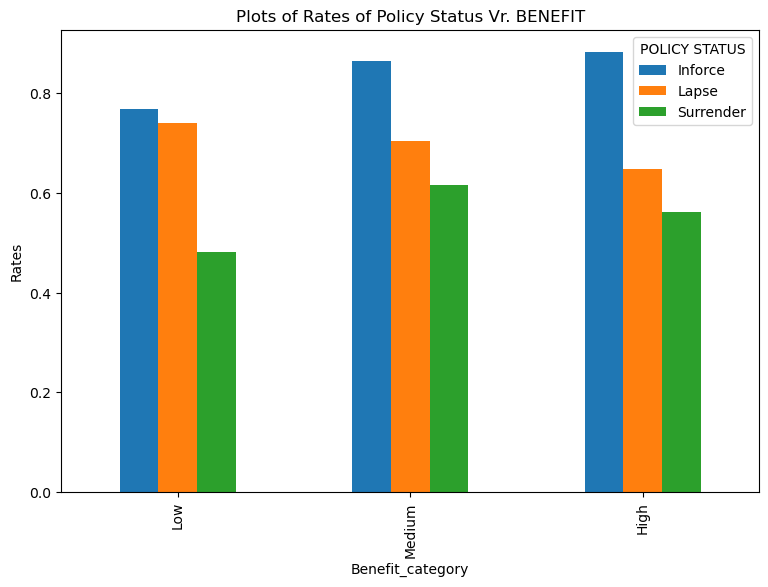

In [27]:
low, high = life_df['BENEFIT'].quantile([.2, .99])
benefit_df = life_df[life_df['BENEFIT'].between(low, high)]
benefits_df = benefit_df[['BENEFIT', 'POLICY STATUS']].groupby('BENEFIT', as_index=False)['POLICY STATUS'].value_counts()
benefits_df.rename({'count':'Status_Count'}, axis = 1, inplace = True)
ben_df= benefit_df[['BENEFIT']].groupby('BENEFIT')['BENEFIT'].count().to_frame()
ben_df.rename(columns = {'BENEFIT':'S_count'}, inplace = True)
ben_df.reset_index(inplace = True)
ben_Rates = (benefits_df.merge(ben_df,left_on='BENEFIT',right_on = 'BENEFIT',
                 how = 'left').assign(rates = lambda x:x['Status_Count'].div(x['S_count'])).reindex(columns = [*benefits_df.columns]+['rates']))
labels = ['Low','Medium','High']
intervals = np.linspace(min(ben_Rates['BENEFIT']),max(ben_Rates['BENEFIT']),4)
print(intervals)
ben_Rates["Benefit_category"] = pd.cut(ben_Rates['BENEFIT'], intervals, labels= labels, include_lowest=True)
ben_group = ben_Rates[['POLICY STATUS', 'Benefit_category','rates']].groupby(['Benefit_category','POLICY STATUS'], as_index=False)['rates'].mean()
ben_tb = ben_group.pivot(index = 'Benefit_category', columns = 'POLICY STATUS', values = 'rates')
print(ben_tb)
ben_tb.plot(kind = 'bar',ylabel = 'Rates',title = 'Plots of Rates of Policy Status Vr. BENEFIT',figsize = (9,6))
plt.show()

## MODEL BUILDING
###  Data Preprocessing

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, normalize
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix,classification_report,precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.utils.class_weight import compute_sample_weight

In [29]:
policy_type_3 = pd.get_dummies(life_df['POLICY TYPE 3'], prefix='PT3', prefix_sep= '-', drop_first=True)
payment_mode = pd.get_dummies(life_df['PAYMENT MODE'], prefix='Payment_mode', prefix_sep= '-',drop_first=True)
Non_Lapse_Gauranteed = pd.get_dummies(life_df['NON LAPSE GUARANTEED'], prefix='NLG', prefix_sep= '-',drop_first=True)
df = pd.concat([life_df,Non_Lapse_Gauranteed,payment_mode,policy_type_3], axis = 1)
df.drop(columns=['NON LAPSE GUARANTEED','PAYMENT MODE','POLICY TYPE 3','Issue Date' ], axis = 1, inplace = True)
df["POLICY STATUS"] =df["POLICY STATUS"].map({'Inforce':1, 'Lapse':2, 'Surrender':3})
df["SEX"] = df["SEX"].map({'F':0,'M':1})
df['Full Benefit?'] = df['Full Benefit?'].map({'N':0,'Y':1})
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY STATUS,BENEFIT,SUBSTANDARD RISK,...,NLG-NLG Not Active,NLG-NLG Suspend,NLG-NO NLG,Payment_mode-Monthly,Payment_mode-Quaterly,Payment_mode-Semiannually,Payment_mode-Single Premium,PT3-B,PT3-C,PT3-E
0,1,1,1,36,0,1,1,1,200000.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,42,1,1,2,1,100000.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,2,40,1,2,3,2,80000.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,3,39,1,1,2,2,100000.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,1,1,4,44,1,1,2,2,100000.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY STATUS', 'BENEFIT', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'NLG-NLG Not Active',
       'NLG-NLG Suspend', 'NLG-NO NLG', 'Payment_mode-Monthly',
       'Payment_mode-Quaterly', 'Payment_mode-Semiannually',
       'Payment_mode-Single Premium', 'PT3-B', 'PT3-C', 'PT3-E'],
      dtype='object')

In [31]:
df.describe().round(2)

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY STATUS,BENEFIT,SUBSTANDARD RISK,...,NLG-NLG Not Active,NLG-NLG Suspend,NLG-NO NLG,Payment_mode-Monthly,Payment_mode-Quaterly,Payment_mode-Semiannually,Payment_mode-Single Premium,PT3-B,PT3-C,PT3-E
count,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,...,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00,81927.00
mean,4.16,2.46,10.12,34.84,0.60,6.70,29.45,1.72,34725.49,0.57,...,0.00,0.01,0.99,0.77,0.04,0.03,0.03,0.02,0.00,0.16
std,2.08,0.56,14.25,10.22,0.49,4.15,22.40,0.63,81181.10,7.46,...,0.05,0.07,0.09,0.42,0.20,0.16,0.17,0.12,0.06,0.36
min,1.00,1.00,0.00,16.00,0.00,1.00,1.00,1.00,30.00,-50.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,0.00,27.00,0.00,3.00,5.00,1.00,10000.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,2.00,1.00,33.00,1.00,6.00,34.00,2.00,20000.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,6.00,3.00,17.00,42.00,1.00,10.00,54.00,2.00,40000.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,3.00,82.00,70.00,1.00,20.00,84.00,3.00,5000000.00,250.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [32]:
features = df.drop(columns = "POLICY STATUS").columns
X = df.drop(columns = "POLICY STATUS").values      # predictive features
y = df["POLICY STATUS"]                             # target variable

In [33]:
X = StandardScaler().fit_transform(X)
X[0:5]

array([[-1.51994908e+00, -2.60583899e+00, -6.39560407e-01,
         1.13339129e-01, -1.22408486e+00, -1.37537029e+00,
        -1.27013890e+00,  2.03588684e+00, -7.58845268e-02,
        -1.33636843e-02, -8.79038498e-02,  0.00000000e+00,
         2.87798476e+00,  3.13376693e+00, -1.77868791e-01,
        -4.99623587e-02, -7.20411641e-02,  9.21610909e-02,
        -1.81937697e+00, -2.13199356e-01, -1.67236597e-01,
        -1.77997944e-01, -1.24322657e-01, -5.67495667e-02,
        -4.30767796e-01],
       [-1.51994908e+00, -2.60583899e+00, -6.39560407e-01,
         7.00251134e-01,  8.16936824e-01, -1.37537029e+00,
        -1.22549968e+00,  8.04065436e-01, -7.58845268e-02,
        -1.33636843e-02, -8.79038498e-02,  0.00000000e+00,
         2.87798476e+00,  3.13376693e+00, -1.91957430e-01,
        -4.99623587e-02, -7.20411641e-02,  9.21610909e-02,
        -1.81937697e+00, -2.13199356e-01, -1.67236597e-01,
        -1.77997944e-01, -1.24322657e-01, -5.67495667e-02,
        -4.30767796e-01],
    

In [34]:
standardized_df = pd.DataFrame(X, 
                               columns=['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2','BENEFIT', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium',
       'Non_Lapse_Gauranteed-NLG Not Active',
       'Non_Lapse_Gauranteed-NLG Suspend', 'Non_Lapse_Gauranteed-NO NLG',
       'Payment_mode-Monthly', 'Payment_mode-Quaterly',
       'Payment_mode-Semiannually', 'Payment_mode-Single Premium',
       'policy_type_3-B', 'policy_type_3-C', 'policy_type_3-E'])
standardized_df.drop(columns = ['Non_Lapse_Gauranteed-NLG Not Active',
       'Non_Lapse_Gauranteed-NLG Suspend', 'Non_Lapse_Gauranteed-NO NLG',
       'Payment_mode-Monthly', 'Payment_mode-Quaterly',
       'Payment_mode-Semiannually', 'Payment_mode-Single Premium',
       'policy_type_3-B', 'policy_type_3-C', 'policy_type_3-E'],axis = 1, inplace = True)
standardized_df.describe().round(3)

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,BENEFIT,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium
count,81927.000,81927.000,81927.000,81927.000,81927.000,81927.000,81927.000,81927.000,81927.000,81927.000,81927.000,81927.0,81927.000,81927.000,81927.000
mean,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.0,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.0,1.000,1.000,1.000
min,-1.520,-2.606,-0.710,-1.843,-1.224,-1.375,-1.270,-0.427,-6.780,-0.013,-0.088,0.0,-1.648,-1.386,-0.227
25%,-1.040,-0.823,-0.710,-0.767,-1.224,-0.893,-1.092,-0.305,-0.076,-0.013,-0.088,0.0,-0.846,-0.821,-0.208
50%,0.882,-0.823,-0.640,-0.180,0.817,-0.169,0.203,-0.181,-0.076,-0.013,-0.088,0.0,0.049,0.309,-0.151
75%,0.882,0.960,0.483,0.700,0.817,0.796,1.096,0.065,-0.076,-0.013,-0.088,0.0,0.662,0.874,-0.058
max,1.842,0.960,5.043,3.439,0.817,3.208,2.435,61.163,33.447,171.056,60.655,0.0,2.878,3.134,74.980


In [35]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(57348, 25)
(24579, 25)


## MODEL BUILDING
### DECISION TREE CLASSIFICATION

In [36]:
#w_train = compute_sample_weight('balanced', y_train)
clf_tree = DecisionTreeClassifier(criterion ='gini', max_depth = 10, max_features = 'sqrt', min_samples_leaf = 5, min_samples_split = 4, splitter = 'best')
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=4)

In [37]:
y_pred = clf_tree.predict(X_test)
y_pred[0:5]

array([2, 1, 2, 2, 1], dtype=int64)

In [38]:
accuracy_DT = round(accuracy_score(y_test,y_pred), 4)
mse_DT = round(mean_squared_error(y_test, y_pred),4)
pr_f1 = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
print("Accuracy:", accuracy_DT)
print("Mean Square Error:", mse_DT)
print("Precision_f1_score:",pr_f1 )

Accuracy: 0.6733
Mean Square Error: 0.377
Precision_f1_score: (0.6679895078797202, 0.6732983441148949, 0.6419924000405176, None)


In [39]:
cm_DT = confusion_matrix(y_test,y_pred)
cm_DT

array([[ 5314,  3887,    68],
       [ 1835, 11102,    39],
       [  344,  1857,   133]], dtype=int64)

In [40]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 5314  3887    68]
 [ 1835 11102    39]
 [  344  1857   133]]


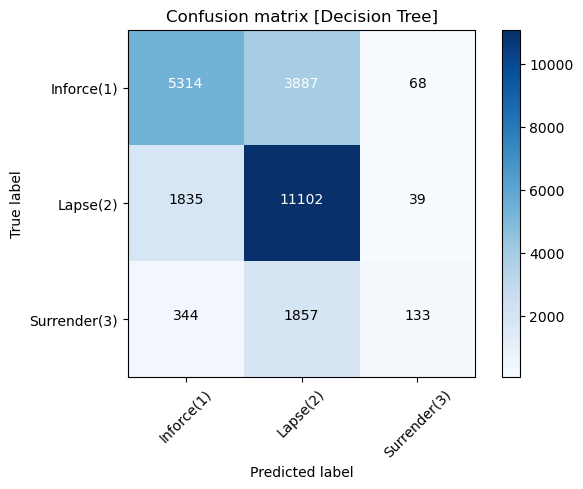

In [41]:
plot_confusion_matrix(cm =cm_DT, classes = [ 'Inforce(1)','Lapse(2)','Surrender(3)'],normalize=False,
                      title = 'Confusion matrix [Decision Tree]')

In [42]:
important_features = clf_tree.feature_importances_
important_features_sk = {}
for i,feature in enumerate(features):
    important_features_sk[feature] = round(important_features[i], 5)
print(important_features_sk )
features_df = pd.DataFrame( list(important_features_sk.items()), columns = ['Features','Degrees'])
features_df

{'CHANNEL1': 0.03902, 'CHANNEL2': 0.00275, 'CHANNEL3': 0.01676, 'ENTRY AGE': 0.02544, 'SEX': 0.00292, 'POLICY TYPE 1': 0.04377, 'POLICY TYPE 2': 0.05006, 'BENEFIT': 0.01729, 'SUBSTANDARD RISK': 0.00089, 'NUMBER OF ADVANCE PREMIUM': 0.0, 'INITIAL BENEFIT': 0.00037, 'Full Benefit?': 0.0, 'Policy Year (Decimal)': 0.56522, 'Policy Year': 0.06099, 'Premium': 0.08837, 'NLG-NLG Not Active': 0.00406, 'NLG-NLG Suspend': 0.0044, 'NLG-NO NLG': 0.0, 'Payment_mode-Monthly': 0.03986, 'Payment_mode-Quaterly': 0.01531, 'Payment_mode-Semiannually': 0.00625, 'Payment_mode-Single Premium': 0.01282, 'PT3-B': 0.0, 'PT3-C': 0.00048, 'PT3-E': 0.00297}


,Features,Degrees
0,CHANNEL1,0.03902
1,CHANNEL2,0.00275
2,CHANNEL3,0.01676
3,ENTRY AGE,0.02544
4,SEX,0.00292
5,POLICY TYPE 1,0.04377
6,POLICY TYPE 2,0.05006
7,BENEFIT,0.01729
8,SUBSTANDARD RISK,0.00089
9,NUMBER OF ADVANCE PREMIUM,0.00000


<Axes: title={'center': 'Feature Importance'}, xlabel='Degree of Importance', ylabel='Features'>

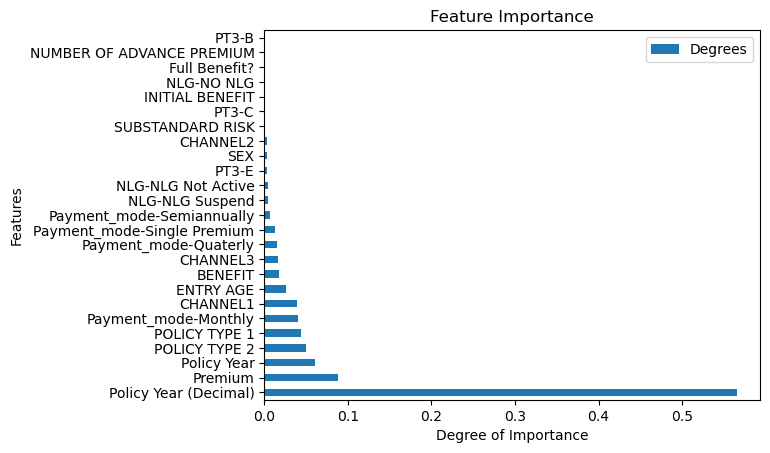

In [43]:
features_df.set_index('Features', inplace = True)
features_df.sort_values(by='Degrees', ascending=False).plot(kind= 'barh', xlabel='Degree of Importance', title='Feature Importance')

In [44]:
'''import warnings
warnings.filterwarnings('ignore')
parameters = {'criterion':['gini', 'entropy'], 
              'splitter':['best','random'],
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[1,4,5,10,20,30,40],
             'min_samples_split':[2,4,5,10,15,20,30],
             'min_samples_leaf':[2,3,4,5,6] }
dt_class = DecisionTreeClassifier()
grid = GridSearchCV(dt_class, param_grid = parameters,n_jobs=1, cv =5)
grid.fit(X_train, y_train)'''

"import warnings\nwarnings.filterwarnings('ignore')\nparameters = {'criterion':['gini', 'entropy'], \n              'splitter':['best','random'],\n              'max_features':['auto', 'sqrt', 'log2'],\n              'max_depth':[1,4,5,10,20,30,40],\n             'min_samples_split':[2,4,5,10,15,20,30],\n             'min_samples_leaf':[2,3,4,5,6] }\ndt_class = DecisionTreeClassifier()\ngrid = GridSearchCV(dt_class, param_grid = parameters,n_jobs=1, cv =5)\ngrid.fit(X_train, y_train)"

In [45]:
'''print("best parameters:", grid.best_params_)
print("Best estimator:",grid.best_estimator_ )'''

'print("best parameters:", grid.best_params_)\nprint("Best estimator:",grid.best_estimator_ )'

In [46]:
'''print("Accuracy score Training:", grid.score(X_train,y_train))
print("Accuracy score Testing:", grid.score(X_test,y_test))'''

'print("Accuracy score Training:", grid.score(X_train,y_train))\nprint("Accuracy score Testing:", grid.score(X_test,y_test))'

### RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [48]:
rf_clf = RandomForestClassifier(n_estimators=3,criterion='gini',max_depth=10, min_samples_leaf=4,min_samples_split=5,max_features ='sqrt',n_jobs = 4,bootstrap=True)
y_train = np.array(y_train).reshape(-1,1)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=3, n_jobs=4)

In [49]:
from sklearn.utils.validation import check_is_fitted
print(check_is_fitted(rf_clf))

None


In [50]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf[0:5]

array([2, 1, 2, 2, 1], dtype=int64)

In [51]:
accuracy_RF = round(accuracy_score(y_test,y_pred_rf), 4)
mse_RF = round(mean_squared_error(y_test, y_pred_rf),4)
pr_f1_RF = precision_recall_fscore_support(y_test, y_pred_rf, average = 'weighted')
print("Accuracy:", accuracy_RF)
print("Mean Square Error:", mse_RF)
print("Precision_f1_score:",pr_f1_RF)

Accuracy: 0.681
Mean Square Error: 0.368
Precision_f1_score: (0.6869191698327418, 0.6810285202815411, 0.6473682454366511, None)


Confusion matrix, without normalization
[[ 5353  3876    40]
 [ 1686 11279    11]
 [  362  1865   107]]


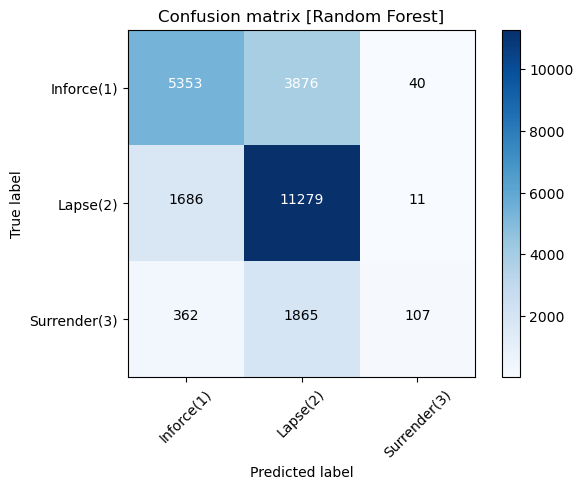

In [52]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm =cm_rf, classes = ['Inforce(1)','Lapse(2)','Surrender(3)'],normalize=False,
                      title = 'Confusion matrix [Random Forest]')

In [53]:
important_features_rf = rf_clf.feature_importances_
rf_important_features_sk = {}
for i,feature in enumerate(features):
    rf_important_features_sk[feature] = round(important_features_rf[i], 5)
print(rf_important_features_sk )
features_rf_df = pd.DataFrame( list(rf_important_features_sk.items()), columns = ['Features','Degrees'])
features_rf_df

{'CHANNEL1': 0.00894, 'CHANNEL2': 0.01306, 'CHANNEL3': 0.01928, 'ENTRY AGE': 0.0241, 'SEX': 0.0023, 'POLICY TYPE 1': 0.0341, 'POLICY TYPE 2': 0.17309, 'BENEFIT': 0.03455, 'SUBSTANDARD RISK': 0.00193, 'NUMBER OF ADVANCE PREMIUM': 0.00045, 'INITIAL BENEFIT': 8e-05, 'Full Benefit?': 0.0, 'Policy Year (Decimal)': 0.08291, 'Policy Year': 0.38126, 'Premium': 0.05111, 'NLG-NLG Not Active': 0.00298, 'NLG-NLG Suspend': 0.00565, 'NLG-NO NLG': 0.00145, 'Payment_mode-Monthly': 0.07278, 'Payment_mode-Quaterly': 0.02014, 'Payment_mode-Semiannually': 0.00746, 'Payment_mode-Single Premium': 0.05614, 'PT3-B': 0.0, 'PT3-C': 0.00073, 'PT3-E': 0.0055}


,Features,Degrees
0,CHANNEL1,0.00894
1,CHANNEL2,0.01306
2,CHANNEL3,0.01928
3,ENTRY AGE,0.02410
4,SEX,0.00230
5,POLICY TYPE 1,0.03410
6,POLICY TYPE 2,0.17309
7,BENEFIT,0.03455
8,SUBSTANDARD RISK,0.00193
9,NUMBER OF ADVANCE PREMIUM,0.00045


<Axes: title={'center': 'Feature Importances'}, xlabel='Degree of Importances', ylabel='Features'>

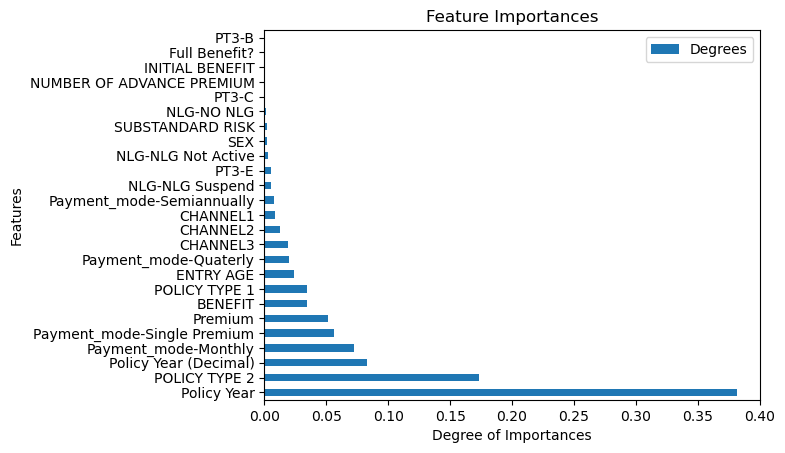

In [54]:
features_rf_df.set_index('Features', inplace=True)
features_rf_df.sort_values(by = 'Degrees', ascending=False).plot(kind = 'barh', title = 'Feature Importances', xlabel = 'Degree of Importances')

In [55]:
'''parameters = {'n_estimators':[4,5,10,20,40,50,100,200,250],
              'criterion':['gini', 'entropy'], 
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[5,10,20,30,40,50,60,100],
             'min_samples_split':[2,4,5,10,15,20,30],
             'min_samples_leaf':[2,3,4,5] }
rd_clf = RandomForestClassifier()
rd_grid = GridSearchCV(rd_clf, param_grid = parameters,n_jobs=2, cv =5)
rd_grid.fit(X_train, y_train)'''

"parameters = {'n_estimators':[4,5,10,20,40,50,100,200,250],\n              'criterion':['gini', 'entropy'], \n              'max_features':['auto', 'sqrt', 'log2'],\n              'max_depth':[5,10,20,30,40,50,60,100],\n             'min_samples_split':[2,4,5,10,15,20,30],\n             'min_samples_leaf':[2,3,4,5] }\nrd_clf = RandomForestClassifier()\nrd_grid = GridSearchCV(rd_clf, param_grid = parameters,n_jobs=2, cv =5)\nrd_grid.fit(X_train, y_train)"

# SVM

In [56]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, f1_score

In [57]:
svm_model = SVC(kernel = 'rbf', gamma ='auto')
svm_model.fit(X_train, y_train)
pred_svm = svm_model.predict(X_test)
#print("Model Summary:", classification_report(y_test,pred_svm))

In [58]:
accuracy_svm = round(accuracy_score(y_test,pred_svm), 4)
mse_svm = round(mean_squared_error(y_test, pred_svm),4)
pr_f1_svm = precision_recall_fscore_support(y_test, pred_svm,average = 'weighted')
print("Accuracy:", accuracy_svm)
print("Mean Square Error:", mse_svm)
print("Precision_f1_score:",pr_f1_svm)

Accuracy: 0.6806
Mean Square Error: 0.3667
Precision_f1_score: (0.6949112816644365, 0.6806216689043493, 0.6449825097122446, None)


Confusion matrix, without normalization
[[ 5327  3929    13]
 [ 1640 11325    11]
 [  375  1882    77]]


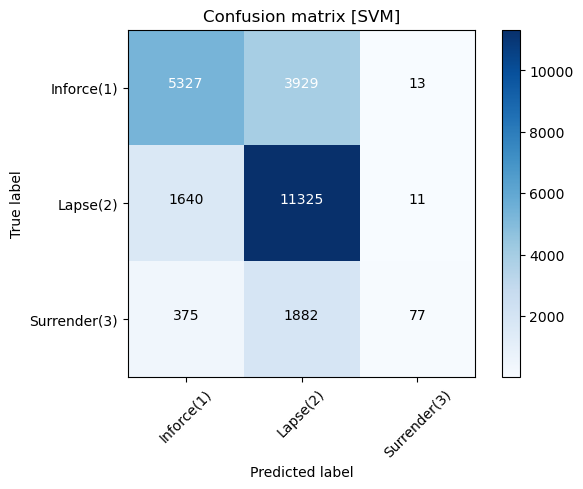

In [59]:
cm_svm = confusion_matrix(y_test,pred_svm)
plot_confusion_matrix(cm =cm_svm, classes = ['Inforce(1)','Lapse(2)','Surrender(3)'],normalize=False,
                      title = 'Confusion matrix [SVM]')

## Considering Lapse Surrender and Inforce Due to Accuracy

In [60]:
DT_list = [accuracy_DT,mse_DT,]
for i, metr in enumerate(pr_f1):
    DT_list.append(pr_f1[i])
Rf_list = [accuracy_RF,mse_RF,]
for i, metr in enumerate(pr_f1_RF):
    Rf_list.append(pr_f1_RF[i])
SVM_list = [accuracy_svm,mse_svm,]
for i, metr in enumerate(pr_f1_svm):
    SVM_list.append(pr_f1_svm[i])
metric_dict = {"Decision Tree" : DT_list,"Random Forest":Rf_list,"SVM":SVM_list}
print(metric_dict)
metric_df = pd.DataFrame(metric_dict, index=['Accuracy', 'MSE', 'Precision', 'Recall','F1_score','Support']).round(4)
metric_df.dropna(inplace=True)
metric_df

{'Decision Tree': [0.6733, 0.377, 0.6679895078797202, 0.6732983441148949, 0.6419924000405176, None], 'Random Forest': [0.681, 0.368, 0.6869191698327418, 0.6810285202815411, 0.6473682454366511, None], 'SVM': [0.6806, 0.3667, 0.6949112816644365, 0.6806216689043493, 0.6449825097122446, None]}


,Decision Tree,Random Forest,SVM
Accuracy,0.6733,0.6810,0.6806
MSE,0.3770,0.3680,0.3667
Precision,0.6680,0.6869,0.6949
Recall,0.6733,0.6810,0.6806
F1_score,0.6420,0.6474,0.6450


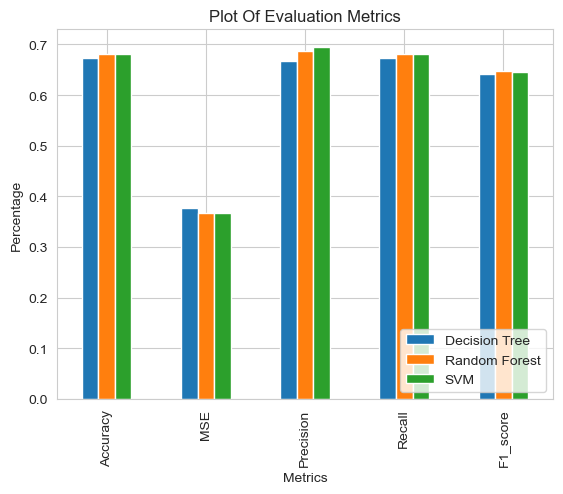

In [61]:
 #metric_df.iloc[4:, 0:3].drop(inplace=True)
sns.set_style('whitegrid')
metric_df.plot(kind= 'bar', title = 'Plot Of Evaluation Metrics', xlabel = 'Metrics', ylabel =  'Percentage')
plt.legend(loc = 'lower right');